Dimensionality Reduction

It is a class of techniques in machine learning which are used to help us solve machine learning problems in a more computationally efficient way. The basic idea is that there is large number of dimensions involved to represent problem instants basically the feature vector of problem instants has a large number of dimensions. Working with these dimensions is highly computational intensive and dimensionality reduction techniques helps to solve these problem.

#Data Setup

The data is collected from https://archive.ics.uci.edu/ml/machine-learning-databases/00383/risk_factors_cervical_cancer.csv There are 36 feature in this dataset which are obtained from 858 patients. This dataset is recoded in csv format.

In [2]:
import pandas as pd

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00383/risk_factors_cervical_cancer.csv'
df = pd.read_csv(url, na_values="?")  # NaN values are given as ? in the dataset
df.head() # Show the first 5 rows

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


Here missing data is represented as NaN values and they will affect the downstream analysis. So the simplest work around is to drop all rows which has the missing values but this will led to huge reduction in the data size . To get rid of them while minimizing the extent of skewing the data, a technique called imputation is used.

Plot pair wise relationship of features. 

In [1]:
from sklearn.preprocessing import Imputer

# Impute missing values, and transform the data
impute =  pd.DataFrame(Imputer().fit_transform(df))
impute.columns = df.columns
impute.index = df.index

impute.head()

NameError: name 'pd' is not defined

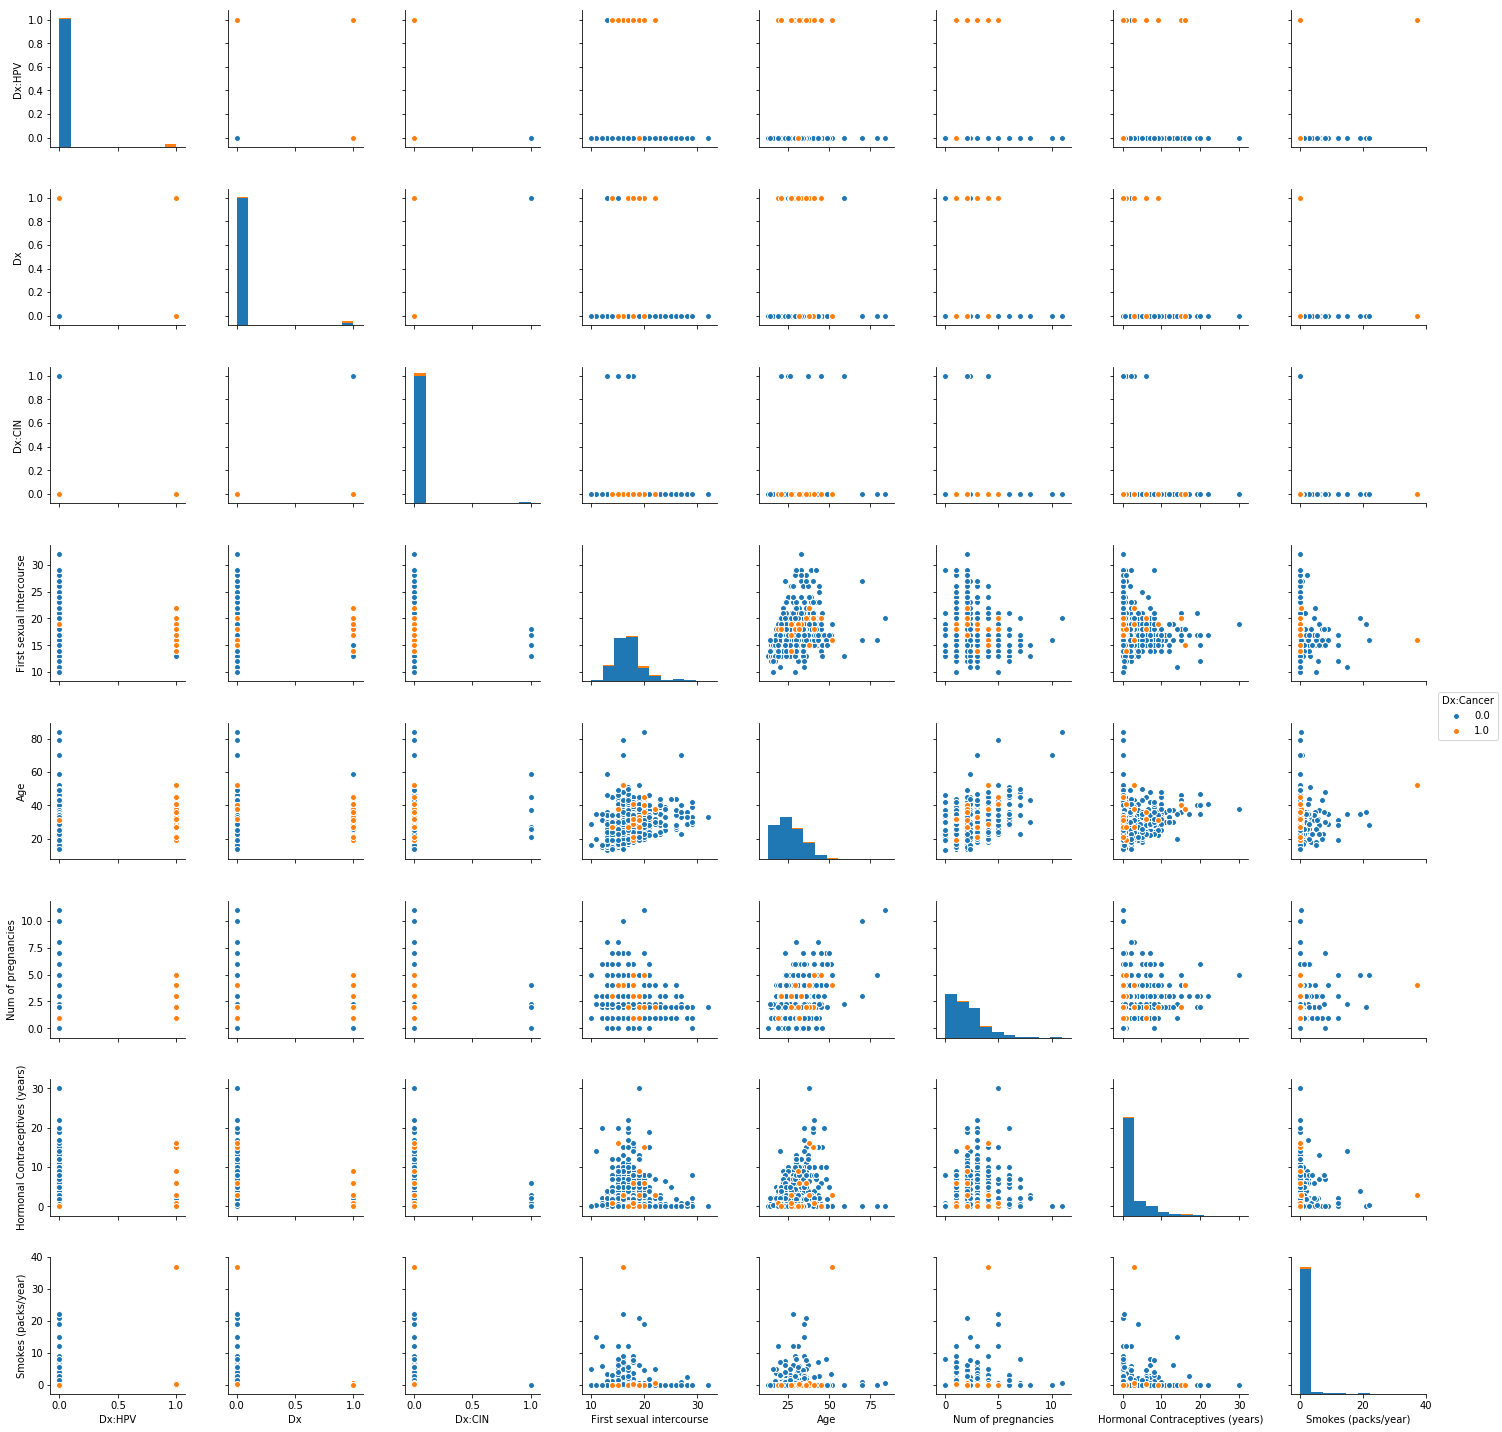

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


# 8 selected features, ranked by importance
cols = ['Dx:HPV', 'Dx', 
        'Dx:CIN', 'First sexual intercourse', 
        'Age', 'Num of pregnancies',
        'Hormonal Contraceptives (years)', 'Smokes (packs/year)']

# Prepare a Seaborn pairplot based on the features above
sns.pairplot(impute,
             x_vars = cols,
             y_vars = cols,
             hue = 'Dx:Cancer')

plt.savefig("Section_07_pairplot.png", dpi=300)
plt.show()

We can get important score for each feature. Many features has 0 importance score. These feature can be removed.

In [4]:
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

# Extra tree classifier
model = ExtraTreesClassifier()
features=impute[0:]
model.fit(features, df["Dx:Cancer"])

# Rank features by relative importance
importance = list(zip(model.feature_importances_, features.columns))
importance.sort(reverse=True)

# Print the feature importance
for value, name in importance:
    print("{}: {}".format(name, value))

Dx:Cancer: 0.488140018568
Dx: 0.197935205761
Dx:HPV: 0.171616524028
Num of pregnancies: 0.0205134804818
Dx:CIN: 0.0195773809524
Hormonal Contraceptives (years): 0.0138341091144
Biopsy: 0.0135481286693
IUD: 0.00917112514104
First sexual intercourse: 0.00867051168293
STDs: Number of diagnosis: 0.00790624094353
IUD (years): 0.00694463340892
STDs:HPV: 0.00574748336023
Schiller: 0.00563657361808
Smokes (packs/year): 0.00544535200311
STDs:HIV: 0.00453968253968
Hormonal Contraceptives: 0.00419965671454
STDs: 0.00378306878307
STDs:vulvo-perineal condylomatosis: 0.00288472012368
Age: 0.00217526455026
STDs:pelvic inflammatory disease: 0.00208625116713
Number of sexual partners: 0.00189153439153
Smokes: 0.00170238095238
STDs: Time since last diagnosis: 0.00113492063492
Citology: 0.000585725507448
STDs:syphilis: 0.000303996598639
STDs:condylomatosis: 2.06389643192e-05
STDs:genital herpes: 5.39133999314e-06
Smokes (years): 0.0
STDs:vaginal condylomatosis: 0.0
STDs:molluscum contagiosum: 0.0
STDs:ce

Below pca is used to reduce 35 features to 3 principle components
PC1 59.41%
PC2 14.59%
PC3 9.02%


Explained variance:
PC1 59.41%
PC2 14.59%
PC3 9.02%


<IPython.core.display.Javascript object>


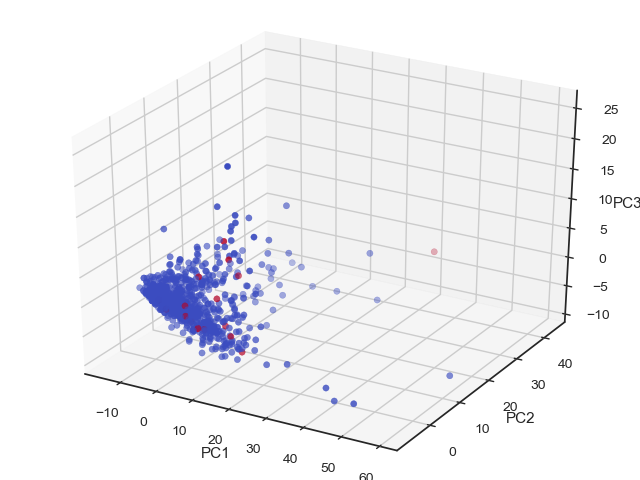

In [8]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


sns.set(style='ticks')

# We would like to separate features from class labels.
# In this dataset, the Dx:Cancer column defines if the individual has cervical cancer.
# The rest of the columns can be treated as features for the prediction of cervical cancer.
features = impute.drop('Dx:Cancer', axis=1)
y = impute["Dx:Cancer"]

# Perform PCA
pca = PCA(n_components=3)
X_r = pca.fit_transform(features)

# Percentage of variance explained for each components
print("Explained variance:\nPC1 {:.2%}\nPC2 {:.2%}\nPC3 {:.2%}"
      .format(pca.explained_variance_ratio_[0],
              pca.explained_variance_ratio_[1],
              pca.explained_variance_ratio_[2]))

# Show as 3D scatter plot
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X_r[:, 0], X_r[:, 1], X_r[:, 2], c=y, cmap=plt.cm.coolwarm)

# Label the axes
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

<IPython.core.display.Javascript object>


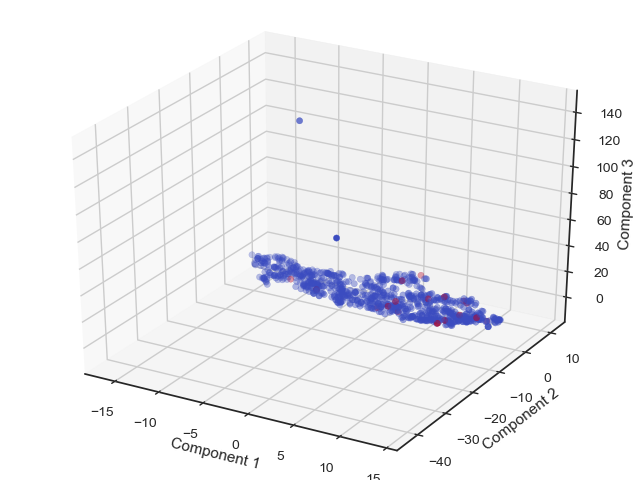

In [6]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D


sns.set(style='ticks')

# Perform t-SNE
tsne = TSNE(n_components=3, init='pca', random_state=0)
X_tsne = tsne.fit_transform(features)
y = impute["Dx:Cancer"]

# Show as 3D scatter plot
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=y, cmap=plt.cm.coolwarm)

# Label the axes
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

plt.show()

Reference:

https://www.packtpub.com/mapt/video/big_data_and_business_intelligence/9781788839754/38269/38310/methods-for-dimension-reduction

https://en.wikipedia.org/wiki/Dimensionality_reduction

https://www.youtube.com/watch?v=EFJhO_6zWm0&t=315s

 https://www.codementor.io/jadianes/data-science-python-pandas-r-dimensionality-reduction-du1081aka